# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

# Integrantes

### Jose Alberto Arango Sánchez


### Leon Dario Arango Amaya

In [52]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [53]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [54]:
from sklearn import tree

def treeDecisionClassifierTrain(Xtrain,Ytrain,depth):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xtrain,Ytrain)
    return clf

In [55]:
def treeDecisionClassifierValidation(modelTree,Xtest):
    return modelTree.predict(Xtest)

In [56]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold


#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    model = treeDecisionClassifierTrain(Xtrain,Ytrain,10)
    
    
    
    #Validación
    Ytrain_pred =treeDecisionClassifierValidation(model,Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    Yest =treeDecisionClassifierValidation(model,Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1
        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.901380819032+-0.0323919251015


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:

**R//:** El crecimiento del arbol se puede detener utilizando:
- Definiendo el maximo numero de profundida del arbol, para esto se utiliza el paramtero max_depth
- Definiendo un umbral: Calculamos la impureza de un nodo y si este está por encima del umbral definido se dividirá, de lo contrario sera un hoja. Este parametro es: min_impurity_split dentro de la libreria.
- Estableciendo el número mínimo de muestras que se requieren para dividir un nodo.Este parametro es:min_samples_split
- Estableciendo el número mínimo de muestras que pueden estar en un nodo hoja. Este parametro es: min_samples_leaf

1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:

**R//:**max_depth, min_impurity_split, min_samples_split, min_samples_leaf

In [57]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold

def treeValidation(depth):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = treeDecisionClassifierTrain(Xtrain,Ytrain,depth)

    

        #Validación
        Ytrain_pred =treeDecisionClassifierValidation(model,Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest =treeDecisionClassifierValidation(model,Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return np.mean(EficienciaVal),np.std(EficienciaVal)

## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [76]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
cont = 0
print("Maxima profundidad |", "Eficiencia en validacion|","Intervalo de confianza|")
for i in df_types.index:
    eficiencia,confianza = treeValidation(i)
    print(str(i),"                  ", str(eficiencia), "          ", str(confianza))
    #df_types["Eficiencia en validacion"][cont] = str(eficiencia)
    #df_types["Intervalo de confianza"][cont] = str(confianza)
    cont = cont +1
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Maxima profundidad | Eficiencia en validacion| Intervalo de confianza|
5                    0.911188480595            0.0446095825565
10                    0.901380819032            0.0323919251015
20                    0.901380819032            0.0323919251015
30                    0.901380819032            0.0323919251015
50                    0.901380819032            0.0323919251015


A Jupyter Widget

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [61]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,,
10,,
20,,
30,,
50,,


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.    

**R//:**Si tiene algún efecto la normalización, pero No es significativo, ya que la diferencia es minima.

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [78]:
from sklearn.ensemble import RandomForestClassifier
def randomForestClassifierTrain(Xtrain,Ytrain,n_tree, maxFeatures):
    clf = RandomForestClassifier(n_estimators=n_tree,max_features=maxFeatures)
    clf = clf.fit(Xtrain,Ytrain)
    return clf

In [79]:
def randomForestClassifierValidation(Xtest,model):
    return model.predict(Xtest)

In [80]:
from sklearn.ensemble import BaggingClassifier
def BaggingClassifierTrain(Xtrain,Ytrain, nTree, maxFeatures):
    bagging = BaggingClassifier(n_estimators=nTree,max_features=maxFeatures)
    bagging = bagging.fit(Xtrain,Ytrain)
    return bagging

In [81]:
def BaggingClassifierValidation(Xtest,model):
    return model.predict(Xtest)

In [92]:
#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    model = randomForestClassifierTrain(Xtrain,Ytrain,5,5)
    
    
    
    #Validación
    Ytrain_pred =randomForestClassifierValidation(Xtrain,model) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    Yest =randomForestClassifierValidation(Xtest,model) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1
        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 0.998146417588+-0.00131189649442
Eficiencia durante la validación = 0.877752907769+-0.0143381391133


In [93]:
def randomForest(nTree, maxFeatures):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = randomForestClassifierTrain(Xtrain,Ytrain,nTree,maxFeatures)



        #Validación
        Ytrain_pred =randomForestClassifierValidation(Xtrain,model) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest =randomForestClassifierValidation(Xtest,model) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return np.mean(EficienciaVal),np.std(EficienciaVal)

In [106]:
randomForest(5,5)

(0.87775290776943971, 0.014338139113272093)

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [114]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types2["Eficiencia en validacion"] = ""
df_types2["Intervalo de confianza"] = ""
df_types2.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
cont = 0
print("Maxima profundidad |", "Eficiencia en validacion|","Intervalo de confianza|")

for i,j in df_types.index:
    
    eficiencia,confianza = randomForest(i,j)
    print(str(i),str(j),"", str(eficiencia), "", str(confianza))
    cont = cont +1
#df_types["Eficiencia en validacion"][0]=0.8778
#df_types["Intervalo de confianza"][0] = 0.0143
df_types2.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

Maxima profundidad | Eficiencia en validacion| Intervalo de confianza|
5 5  0.877752907769  0.0143381391133
5 10  0.924917160951  0.0364477044298
5 15  0.937502185837  0.0154048130278
5 20  0.9362140803  0.0274170373033
5 25  0.902769880839  0.0277680794555
5 30  0.923712792712  0.0327966976965
10 5  0.915317208911  0.03362828793
10 10  0.926522298817  0.024224533125
10 15  0.923604498871  0.0345354428294
10 20  0.925032275023  0.0250143391892
10 25  0.922300712092  0.0267697988789
10 30  0.922347012676  0.0304132181099
20 5  0.945890434925  0.015236054514
20 10  0.934801485198  0.0248351790223
20 15  0.938829251527  0.0228975690857
20 20  0.93332741132  0.0243990294576
20 25  0.926429180309  0.0252216926655
20 30  0.930634559877  0.02780783819
50 5  0.95546659357  0.0207817313875
50 10  0.952750205973  0.0239716726752
50 15  0.947171200032  0.021994172967
50 20  0.934747595518  0.0227230307502
50 25  0.937548480704  0.0267687379477
50 30  0.925009253352  0.0228017032977
100 5  0.96938

A Jupyter Widget

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [115]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                            
5                 5                                                        
                  10                                                       
                  15                                                       
                  20                                                       
                  25                                                       
                  30                                                       
10                5                                                        
                  10                                                       
                  15                                                       
                  20                                                       
                  25                                                       
                  30                                                       
20                5                                                        
                  10                                                       
                  15                                                       
                  20                                                       
                  25                                                       
                  30                                                       
50                5                                                        
                  10                                                       
                  15                                                       
                  20                                                       
                  25                                                       
                  30                                                       
100               5                                                        
                  10                                                       
                  15                                                       
                  20                                                       
                  25                                                       
                  30                                                       

                                                Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                         
5                 5                                                     
                  10                                                    
                  15                                                    
                  20                                                    
                  25                                                    
                  30                                                    
10                5                                                     
                  10                                                    
                  15                                                    
                  20                                                    
                  25                                                    
                  30                                                    
20                5                                                     
                  10                                                    
                  15                                                    
                  20                                                    
                  25                                                    
                  30                                                    
50                5                                                     
                  10                                                    
         

In [126]:
#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
#Bagging
EficienciaTrainBagging = np.zeros(Folds)
EficienciaValBagging =  np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    # Model RandomForest
    modelRandomForest = randomForestClassifierTrain(Xtrain,Ytrain,5,39)
    # Model Bagging
    modelBagging = BaggingClassifierTrain(Xtrain,Ytrain,5,39)
    
    #Validación RandomForest
    Ytrain_predRandomForest =randomForestClassifierValidation(Xtrain,modelRandomForest) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    YestRandomForest =randomForestClassifierValidation(Xtest,modelRandomForest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Validación Bagging
    Ytrain_predBagging =BaggingClassifierValidation(Xtrain,modelBagging) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    YestBagging =BaggingClassifierValidation(Xtest,modelBagging) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
       
    # RandomForest Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_predRandomForest.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(YestRandomForest.ravel() == Ytest.ravel())
    
     # Bagging Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrainBagging[j] = np.mean(Ytrain_predBagging.ravel() == Ytrain.ravel())
    EficienciaValBagging[j] = np.mean(YestBagging.ravel() == Ytest.ravel())
    j += 1
        
print("RANDOM FOREST")        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
print("BAGGING")
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrainBagging)) + '+-' + str(np.std(EficienciaTrainBagging)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaValBagging)) + '+-' + str(np.std(EficienciaValBagging)))


RANDOM FOREST
Eficiencia durante el entrenamiento = 0.996293697263+-0.0013155375754
Eficiencia durante la validación = 0.914029109091+-0.0413224756139
BAGGING
Eficiencia durante el entrenamiento = 0.994917644826+-0.00494658319937
Eficiencia durante la validación = 0.905648703482+-0.0376147565053


Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

**R//:** Si comparamos minuciosamente los valores de la eficiencia para ambos algoritmos, tanto en la fase de entrenamiento como en la de validación se puede notar que en el Random Forest es mas eficiente, pero la diferencia es muy minima.

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

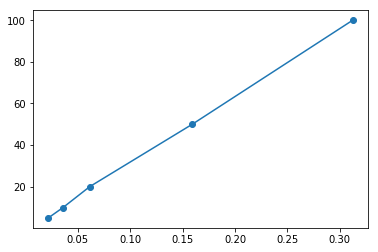

In [139]:
import time
tress =[5,10,20,50,100]
times = []
for tree in tress:
    start = time.clock()
    modelRandomForesClassifier = randomForestClassifierTrain(Xtrain,Ytrain,tree,20)
    Yest =randomForestClassifierValidation(Xtest,modelRandomForesClassifier) 
    finish =time.clock()-start
    times.append(finish)
times

plt.figure()
plt.plot(times,tress,'o-')
plt.show()

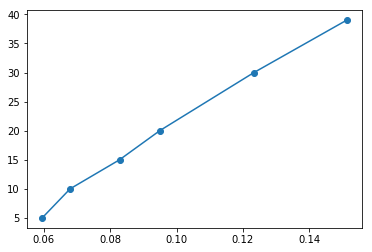

In [141]:
features =[5,10,15,20,30,39]
times = []
for feature in features:
    start = time.clock()
    modelRandomForesClassifier = randomForestClassifierTrain(Xtrain,Ytrain,30,feature)
    Yest =randomForestClassifierValidation(Xtest,modelRandomForesClassifier)
    finish =time.clock()-start
    times.append(finish)

plt.figure()
plt.plot(times,features,'o-')
plt.show()